In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Four stocks choosen from NIFTY 50 are: ADANIPORTS, BPCL, HINDUSTAN UNILIVER and GAIL

INSTRUCTION 1

In [2]:
ADA = pd.read_csv('D:/ISB/Term3/First Visit/FA/GroupAssignment/ADANIPORTS.BO.csv')
BP  = pd.read_csv('D:/ISB/Term3/First Visit/FA/GroupAssignment/BPCL.NS.csv')
GA  = pd.read_csv('D:/ISB/Term3/First Visit/FA/GroupAssignment/GAIL.NS.csv')
HIN = pd.read_csv('D:/ISB/Term3/First Visit/FA/GroupAssignment/HINDUNILVR.NS.csv')
NIF = pd.read_csv('D:/ISB/Term3/First Visit/FA/GroupAssignment/^NSEI.csv')

In [3]:
ADA1 =ADA.ix[:,['Date','Adj Close']]
BP1  =BP.ix[:,['Date','Adj Close']]
GA1  =GA.ix[:,['Date','Adj Close']]
HIN1 =HIN.ix[:,['Date','Adj Close']]
NIF1 =NIF.ix[:,['Date','Adj Close']]

In [4]:
#Calculating monthly return from adjacent close
ADA1['RET_ADA'] = ADA1['Adj Close'].pct_change()
BP1 ['RET_BP'] = BP1 ['Adj Close'].pct_change()
GA1 ['RET_GA'] = GA1 ['Adj Close'].pct_change()
HIN1['RET_HIN'] = HIN1['Adj Close'].pct_change()
NIF1['RET_NIF'] = NIF1['Adj Close'].pct_change()

In [5]:
#Seperating data till 2015 and 2016 data
ADA1['Date']=pd.to_datetime(ADA1['Date'])
ADA1_15 = ADA1[(ADA1.Date < '31-01-2016')]
ADA1_16 = ADA1[(ADA1.Date > '31-12-2015')]

BP1['Date']=pd.to_datetime(BP1['Date'])
BP1_15 = BP1[(BP1.Date < '31-01-2016')]
BP1_16 = BP1[(BP1.Date > '31-12-2015')]

GA1['Date']=pd.to_datetime(GA1['Date'])
GA1_15 = GA1[(GA1.Date < '31-01-2016')]
GA1_16 = GA1[(GA1.Date > '31-12-2015')]

HIN1['Date']=pd.to_datetime(HIN1['Date'])
HIN1_15 = HIN1[(ADA1.Date < '31-01-2016')]
HIN1_16 = HIN1[(ADA1.Date > '31-12-2015')]

NIF1['Date']=pd.to_datetime(NIF1['Date'])
NIF1_15 = NIF1[(ADA1.Date < '31-01-2016')]
NIF1_16 = NIF1[(ADA1.Date > '31-12-2015')]

In [6]:
#Getting historical average return
Avg_ADA = ADA1_15['RET_ADA'].mean()
Avg_BP = BP1_15['RET_BP'].mean()
Avg_GA = GA1_15['RET_GA'].mean()
Avg_HIN = HIN1_15['RET_HIN'].mean()
Avg_NIF = NIF1_15['RET_NIF'].mean()

In [7]:
#Getting historical variance
Var_ADA = ADA1_15['RET_ADA'].var()
Var_BP = BP1_15['RET_BP'].var()
Var_GA = GA1_15['RET_GA'].var()
Var_HIN = HIN1_15['RET_HIN'].var()
Var_NIF = NIF1_15['RET_NIF'].var()

In [8]:
#Getting covariance between all the pairs
df = pd.concat([ADA1_15['RET_ADA'],BP1_15['RET_BP'],GA1_15['RET_GA'],HIN1_15['RET_HIN'],NIF1_15['RET_NIF']], axis=1)
df = df.ix[1:,:]
cov_a = np.array(df.cov())
df.cov()

,RET_ADA,RET_BP,RET_GA,RET_HIN,RET_NIF
RET_ADA,0.007550,0.003357,-0.000189,0.001219,0.001865
RET_BP,0.003357,0.010809,0.004775,0.001415,0.003206
RET_GA,-0.000189,0.004775,0.006949,-0.000073,0.001525
RET_HIN,0.001219,0.001415,-0.000073,0.005702,0.001057
RET_NIF,0.001865,0.003206,0.001525,0.001057,0.001574


In [9]:
#Getting covariance between all the pairs excluding nifty
df1 = pd.concat([ADA1_15['RET_ADA'],BP1_15['RET_BP'],GA1_15['RET_GA'],HIN1_15['RET_HIN']], axis=1)
df1 = df1.ix[1:,:]
cov_a_1 = np.array(df1.cov())
df1.cov()

,RET_ADA,RET_BP,RET_GA,RET_HIN
RET_ADA,0.007550,0.003357,-0.000189,0.001219
RET_BP,0.003357,0.010809,0.004775,0.001415
RET_GA,-0.000189,0.004775,0.006949,-0.000073
RET_HIN,0.001219,0.001415,-0.000073,0.005702


In [178]:
m

array([[  7.55033744e-03,   3.35653055e-03,  -1.88753637e-04,
          1.21921008e-03,   1.86498051e-03],
       [  3.35653055e-03,   1.08090267e-02,   4.77541397e-03,
          1.41513958e-03,   3.20600851e-03],
       [ -1.88753637e-04,   4.77541397e-03,   6.94850304e-03,
         -7.28133331e-05,   1.52543032e-03],
       [  1.21921008e-03,   1.41513958e-03,  -7.28133331e-05,
          5.70221799e-03,   1.05730626e-03],
       [  1.86498051e-03,   3.20600851e-03,   1.52543032e-03,
          1.05730626e-03,   1.57351302e-03]])

INSTRUCTION 2

In [10]:
#Making pair of data (stock with NIFTY) to compute respective Beta
OP_A_N = pd.concat([ADA1_15['RET_ADA'],NIF1_15['RET_NIF']], axis=1)
OP_B_N = pd.concat([BP1_15['RET_BP'],NIF1_15['RET_NIF']], axis=1)
OP_G_N = pd.concat([GA1_15['RET_GA'],NIF1_15['RET_NIF']], axis=1)
OP_H_N = pd.concat([HIN1_15['RET_HIN'],NIF1_15['RET_NIF']], axis=1)

In [11]:
#Building a model with ADA & NIFTY monthly stock return
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()
regr.fit(OP_A_N.iloc[1:,1].to_frame(),OP_A_N.iloc[1:,0].to_frame())
B_A = regr.coef_
I_A = regr.intercept_
print('Intercept:',regr.intercept_)
print('Beta:',regr.coef_)

Intercept: [ 0.00764136]
Beta: [[ 1.1852336]]


In [12]:
#Building a model with BP & NIFTY monthly stock return
import sklearn.linear_model as skl_lm
regr1 = skl_lm.LinearRegression()
regr1.fit(OP_B_N.iloc[1:,1].to_frame(),OP_B_N.iloc[1:,0].to_frame())
B_B = regr.coef_
I_B = regr.intercept_
print('Intercept:',regr.intercept_)
print('Beta:',regr.coef_)

Intercept: [ 0.00764136]
Beta: [[ 1.1852336]]


In [13]:
#Building a model with GA & NIFTY monthly stock return
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()
regr.fit(OP_G_N.iloc[1:,1].to_frame(),OP_G_N.iloc[1:,0].to_frame())
B_G = regr.coef_
I_G = regr.intercept_
print('Intercept:',regr.intercept_)
print('Beta:',regr.coef_)

Intercept: [-0.00062856]
Beta: [[ 0.96944245]]


In [14]:
#Building a model with HIN & NIFTY monthly stock return
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()
regr.fit(OP_H_N.iloc[1:,1].to_frame(),OP_H_N.iloc[1:,0].to_frame())
B_H = regr.coef_
I_H = regr.intercept_
print('Intercept:',regr.intercept_)
print('Beta:',regr.coef_)

Intercept: [ 0.01116506]
Beta: [[ 0.67193995]]


In [15]:
#Calculated expected market return of all the selected stocks using CAPM
# Taken from http://www.market-risk-premia.com/in.html as per 2015
E_R_m = 10.82/(12*100)
R_f = 8.52/(12*100)
#Calculating expected return of ADA
E_R_A = R_f + B_A * (E_R_m - R_f)
#Calculating expected return of BP
E_R_B = R_f + B_B * (E_R_m - R_f)
#Calculating expected return of HIN
E_R_H = R_f + B_H * (E_R_m - R_f)
#Calculating expected return of GA
E_R_G = R_f + B_G * (E_R_m - R_f)
print('Expected Return of ADA: ', E_R_A)
print('Expected Return of BP: ', E_R_B)
print('Expected Return of HIN: ', E_R_H)
print('Expected Return of GA: ', E_R_G)

Expected Return of ADA:  [[ 0.0093717]]
Expected Return of BP:  [[ 0.0093717]]
Expected Return of HIN:  [[ 0.00838788]]
Expected Return of GA:  [[ 0.0089581]]


INSTRUCTION 3

In [16]:

def markowitz(mu,cv,Er):
    n = len(mu)
    wuns = np.ones(n)
    cvinv = np.linalg.inv(cv)
    A = wuns.T.dot(cvinv).dot(mu)
    B = mu.T.dot(cvinv).dot(mu)
    C = wuns.T.dot(cvinv).dot(wuns)
    D = B*C - A*A
    lam = (C*Er-A)/D
    gam = (B-A*Er)/D
    wts = lam*(cvinv.dot(mu)) + gam*(cvinv.dot(wuns))
    return wts

Portfolio 1 using Historical Returns

In [17]:
#PARAMETERS
mu = np.array([Avg_ADA,Avg_BP,Avg_GA,Avg_HIN])
n = len(mu)
cv = cov_a_1
print(cv)

[[  7.55033744e-03   3.35653055e-03  -1.88753637e-04   1.21921008e-03]
 [  3.35653055e-03   1.08090267e-02   4.77541397e-03   1.41513958e-03]
 [ -1.88753637e-04   4.77541397e-03   6.94850304e-03  -7.28133331e-05]
 [  1.21921008e-03   1.41513958e-03  -7.28133331e-05   5.70221799e-03]]


In [20]:
Er = 0.15/12 #monthly returns
#np.array(E_R_A,E_R_B,E_R_G,E_R_H)

#SOLVE PORTFOLIO PROBLEM
wts = markowitz(mu,cv,Er)
wts

array([ 0.28480725, -0.01906146,  0.35092056,  0.38333365])

In [21]:
print("Weights = ",wts)
print("Sum of weights = ",sum(wts))
print("Expected return = ",wts.T.dot(mu))
print("Std Dev of return = ",np.sqrt(wts.T.dot(cv).dot(wts)))

Weights =  [ 0.28480725 -0.01906146  0.35092056  0.38333365]
Sum of weights =  1.0
Expected return =  0.0125
Std Dev of return =  0.0489678173896


In [22]:
#NUMERICAL OPTIMIZATION
from scipy.optimize import minimize

def port_var(w,cv,mu,Er):
    return w.T.dot(cv).dot(w)

w0 = np.array([0.3,0.2,0.3,0.2])
cons = ({'type': 'eq', 'fun': lambda x:  sum(x)-1.0}, {'type': 'eq', 'fun': lambda x: x.T.dot(mu)-Er})
sol = minimize(port_var,w0,args=(cv,mu,Er),method="SLSQP",constraints=cons)
print(sol.x)
sol

[ 0.31700938 -0.02434147  0.33998397  0.36734813]


     fun: 0.002406767505431784
     jac: array([ 0.00539105,  0.00588871,  0.00431911,  0.004844  ])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([ 0.31700938, -0.02434147,  0.33998397,  0.36734813])

In [23]:
#NUMERICAL OPTIMIZATION WITH NO SHORT SELLING
w0 = np.array([0.3,0.2,0.3,0.2])
cons = ({'type': 'eq', 'fun': lambda x:  sum(x)-1}, {'type': 'eq', 'fun': lambda x: x.T.dot(mu)-Er}, 
        {'type': 'ineq', 'fun': lambda x:  min(x)-0})
sol = minimize(port_var,w0,args=(cv,mu,Er),method="SLSQP",constraints=cons)
sol

     fun: 0.0024317247693287965
     jac: array([ 0.00455579,  0.00646157,  0.00531684,  0.0045797 ])
 message: 'Optimization terminated successfully.'
    nfev: 54
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([  2.54660662e-01,   2.49366500e-18,   3.93196524e-01,
         3.52142814e-01])

In [24]:
ww = sol['x']
print('Expected return = ',ww.dot(mu))
print('Std dev = ',np.sqrt(ww.dot(cv).dot(ww)))

Expected return =  0.0124999999991
Std dev =  0.0493125214254


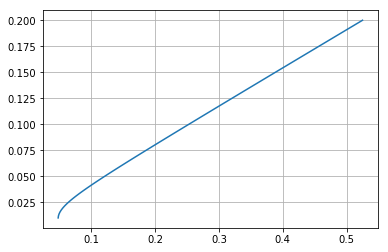

In [25]:
#TRACING OUT THE EFFICIENT FRONTIER
Er_vec = np.linspace(0.01,0.20,100)
Sig_vec = np.zeros(len(Er_vec))
j=0
for Er in Er_vec:
    wts = markowitz(mu,cv,Er)
    Sig_vec[j] = np.sqrt(wts.T.dot(cv).dot(wts))
    j=j+1
    
plt.plot(Sig_vec,Er_vec)
plt.grid()

Portfolio 2 using Expected market returns derived from CAPM

In [26]:
E_R_A = float((E_R_A))
E_R_B = float((E_R_B))
E_R_G = float((E_R_G))
E_R_H = float((E_R_H))
mu1 = np.array([E_R_A,E_R_B,E_R_G,E_R_H])
n = len(mu1)
cv = cov_a_1

In [27]:
#NUMERICAL OPTIMIZATION
sol = minimize(port_var,w0,args=(cv,mu1,Er),method="SLSQP",constraints=cons)
print(sol.x)
sol

[-2.17819009  7.53456318 -2.178183   -2.17819009]


     fun: 0.4051881818750522
     jac: array([ 0.01319878,  0.12129193,  0.04283058, -0.00851025])
 message: 'Iteration limit exceeded'
    nfev: 1232
     nit: 101
    njev: 97
  status: 9
 success: False
       x: array([-2.17819009,  7.53456318, -2.178183  , -2.17819009])

In [28]:
#NUMERICAL OPTIMIZATION WITH NO SHORT SELLING
w0 = np.array([0.3,0.2,0.3,0.2])
cons = ({'type': 'eq', 'fun': lambda x:  sum(x)-1}, {'type': 'eq', 'fun': lambda x: x.T.dot(mu)-Er}, 
        {'type': 'ineq', 'fun': lambda x:  min(x)-0})
sol = minimize(port_var,w0,args=(cv,mu1,Er),method="SLSQP",constraints=cons)
sol

     fun: 0.4051881818750522
     jac: array([ 0.01319878,  0.12129193,  0.04283058, -0.00851025])
 message: 'Iteration limit exceeded'
    nfev: 1232
     nit: 101
    njev: 97
  status: 9
 success: False
       x: array([-2.17819009,  7.53456318, -2.178183  , -2.17819009])

In [29]:
ww = sol['x']
print('Expected return = ',ww.dot(mu))
print('Std dev = ',np.sqrt(ww.dot(cv).dot(ww)))

Expected return =  0.199999999893
Std dev =  0.636543935542


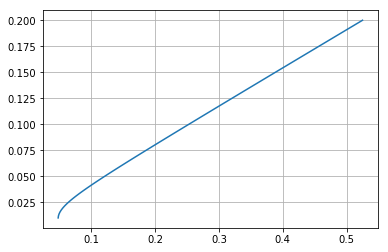

In [30]:
#TRACING OUT THE EFFICIENT FRONTIER
Er_vec = np.linspace(0.01,0.20,100)
Sig_vec = np.zeros(len(Er_vec))
j=0
for Er in Er_vec:
    wts = markowitz(mu,cv,Er)
    Sig_vec[j] = np.sqrt(wts.T.dot(cv).dot(wts))
    j=j+1
    
plt.plot(Sig_vec,Er_vec)
plt.grid()

Using no short selling

Weights of Portfolio 1 using Historical Returns: 0.254660662,0 ,0.393196524,0.352142814

Weights of Portfolio 2 using CAPM : -2.17819009,  7.53456318, -2.178183  , -2.17819009


INSTRUCTION 4

In [31]:
#Getting historical average return
Avg_ADA1 = ADA1_16['RET_ADA'].mean()
Avg_BP1  = BP1_16['RET_BP'].mean()
Avg_GA1  = GA1_16['RET_GA'].mean()
Avg_HIN1 = HIN1_16['RET_HIN'].mean()
Avg_NIF1 = NIF1_16['RET_NIF'].mean()

In [32]:
#Getting historical variance
Var_ADA1 = ADA1_16['RET_ADA'].var()
Var_BP1  =  BP1_16['RET_BP'].var()
Var_GA1  =  GA1_16['RET_GA'].var()
Var_HIN1 = HIN1_16['RET_HIN'].var()
Var_NIF1 = NIF1_16['RET_NIF'].var()

In [33]:
#Expected return of Portfolio 1
w1=0.254660662
w2=0
w3=0.393196524
w4=0.352142814
w_1 = np.array([w1,w2,w3,w4])
E_R_1 = w1*Avg_ADA1 + w2*Avg_BP1 + w3*Avg_GA1 + w4*Avg_HIN1 
print('Expected Return of Portfolio 1: ',E_R_1*100)

Expected Return of Portfolio 1:  1.74846424006


In [34]:
#Variance -Covariance Matrix of Portfolio 1
#Calculating covariance
df2 = pd.concat([ADA1_16['RET_ADA'],BP1_16['RET_BP'],GA1_16['RET_GA'],HIN1_16['RET_HIN']], axis=1)
df2 = df1.ix[1:,:]
cov_a_2 = np.array(df2.cov())
df2.cov()
cov_A_B = 0.003357
cov_B_G = 0.004775
cov_G_H = -0.000073
cov_H_A = 0.001219
cov_A_G=  -0.000189
cov_B_H = 0.001415
cov_var = np.array([[Var_ADA1,cov_A_B,cov_A_G,cov_H_A],[cov_A_B,Var_BP1,cov_B_G,cov_B_H],[cov_A_G,cov_B_G,Var_GA1,cov_G_H],[cov_H_A,cov_B_H,cov_G_H,Var_HIN1]])
cov_var = cov_var.reshape(4,4)
cov_var

array([[  1.90303898e-02,   3.35700000e-03,  -1.89000000e-04,
          1.21900000e-03],
       [  3.35700000e-03,   1.00478907e-02,   4.77500000e-03,
          1.41500000e-03],
       [ -1.89000000e-04,   4.77500000e-03,   8.97771641e-03,
         -7.30000000e-05],
       [  1.21900000e-03,   1.41500000e-03,  -7.30000000e-05,
          1.23140462e-03]])

In [35]:
#Variance of portfolio 1 
Port1_var = np.dot(w_1.T,np.dot(cov_var,w_1))
print('The variance of Portfolio 1: ',Port1_var)

The variance of Portfolio 1:  0.00293541327289


In [36]:
#Expected return of Portfolio 2
w5=-2.17819009
w6=7.53456318
w7=-2.178183
w8=-2.17819009
w_2 =np.array([w5,w6,w7,w8])
E_R_2 = w5*Avg_ADA1 + w6*Avg_BP1 + w7*Avg_GA1 + w8*Avg_HIN1
print('Expected Return of Portfolio 2: ',E_R_2*100)

Expected Return of Portfolio 2:  23.0796739316


In [51]:
#Variance of portfolio 2 
Port2_var = np.dot(w_2.T,np.dot(cov_var,w_2))
print('The variance of Portfolio 1: ',Port2_var)

The variance of Portfolio 1:  0.404858402965


a) We can see that weights of Portfolio 1 (as retreived from Markowitz MVE from historical returns) suggests that no investment should be done in BPCL whereas weights of Portfolio 2 suggest to borrow money and invest in 3 stocks: Adani, Gail and hindustan unilever

b) Expected Return of Portfolio 1:  1.74846424006 and The variance of Portfolio 1:  0.00293541327289
Expected Return of Portfolio 2:  23.0796739316 and The variance of Portfolio 1:  0.404858402965

We can see that the monthly return on portfolio 1 is less than that of Portfolio 2 but the variance of Portfolio 1 is much less than that of Portfolio 2. The higher the reward the greater is the risk. 